
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W8/W6P2.ipynb)





In [ ]:
import os
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
['P2.ipynb', 'combined_csv.csv']


In [ ]:
def download_data():  ### This dude will download the dataset from the directory directly!
  import requests
  url = "https://raw.githubusercontent.com/y-akbal/Tedu_Time_Series/main/W8/aluminium_prices.csv"
  res = requests.get(url, allow_redirects=True)
  with open('aluminium_prices.csv','wb') as file:
    file.write(res.content)

download_data()  

### See [the link text](https://www.kaggle.com/datasets/ibrahimkiziloklu/solar-radiation-dataset) for the description of the dataset.

In [ ]:
data_ = pd.read_csv("combined_csv.csv")
 #### we will use the windspeed

In [ ]:
data_

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Wind Speed,Unnamed: 18
0,2017,1,1,0,0,-0.6,0,0,0,-2.6,0,0,0,86.29,152.92,0.12,1003,1.7,NaN
1,2017,1,1,0,15,-0.6,0,0,0,-2.6,0,0,0,86.29,150.22,0.12,1003,1.7,NaN
2,2017,1,1,0,30,-0.6,0,0,0,-2.6,0,0,0,86.29,147.43,0.12,1003,1.7,NaN
3,2017,1,1,0,45,-0.6,0,0,0,-2.7,0,0,0,85.54,144.60,0.12,1003,1.6,NaN
4,2017,1,1,1,0,-0.7,0,0,0,-2.7,0,0,0,86.17,141.71,0.12,1003,1.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,2019,12,31,22,45,4.0,0,0,0,4.0,0,0,0,100.00,163.63,0.12,999,2.0,NaN
105116,2019,12,31,23,0,3.9,0,0,0,3.9,0,0,0,100.00,162.09,0.12,999,2.0,NaN
105117,2019,12,31,23,15,3.9,0,0,0,3.9,0,0,0,100.00,160.16,0.12,999,2.0,NaN
105118,2019,12,31,23,30,3.9,0,0,0,3.9,0,0,0,100.00,157.93,0.12,999,2.0,NaN


In [ ]:
data = data_["Wind Speed"]

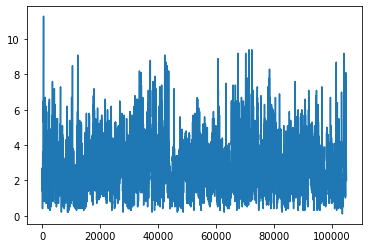

In [ ]:
plt.plot(data)   #### you see there is not explicit trend, nor unit root.

In [ ]:
def splitter(data, alpha = 0.8):  ### We split the data into 0.8 and 0.2  train test splitting we do not do validation.
  N = len(data)
  N_ = int(alpha*N)
  data_train = data[:N_]
  data_test = data[N_:]
  return data_train, data_test

In [ ]:
data_train, data_test = splitter(data)

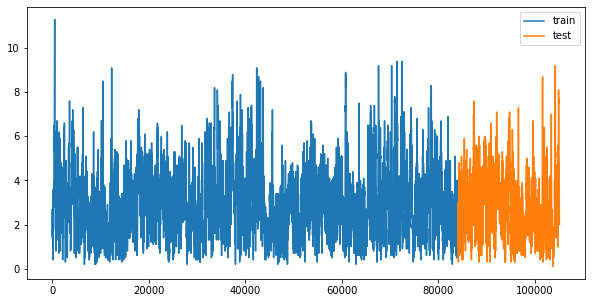

In [ ]:
plt.figure(figsize= (10,5))
plt.plot(data_train, label ="train")
plt.plot(data_test, label = "test")
plt.legend()
plt.show()

In [ ]:
def sliding_window(data:list, window_size:int = 100):
  data = np.array(data)
  X = []
  y = []
  i = 0
  while True:
    try:
      y.append(data[i+1+window_size])
      X.append(data[i:i+window_size])
      i += 1
    except Exception:
      print(f"We have reached the end of the list! There are total number of {i} rows in your data")
      break
  return np.array(X), np.array(y)


In [ ]:
(X_train, y_train), (X_test, y_test) = sliding_window(data_train), sliding_window(data_test)

We have reached the end of the list! There are total number of 83995 rows in your data
We have reached the end of the list! There are total number of 20923 rows in your data


###Start with KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)   #### this give R2 score, no need to import slearn r2score.
y_pred = knn.predict(X_test)

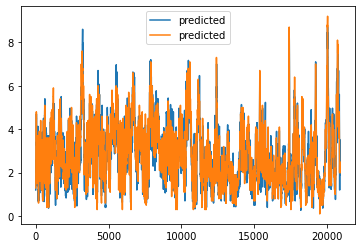

In [ ]:
plt.plot(y_pred, label = "predicted")
plt.plot(y_test, label = "predicted")
plt.legend()
plt.show()

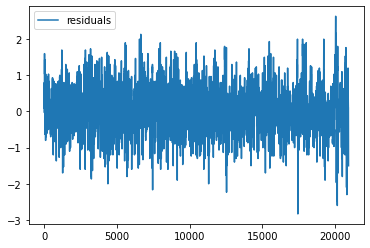

In [ ]:
plt.plot(y_test - y_pred, label = "residuals")
plt.legend()
plt.show()

In [ ]:
np.mean(y_test - y_pred), np.std(y_test - y_pred, ddof = 1)

(0.024720801669613983, 0.5426910250926572)

###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
score = dt.score(X_test, y_test)
print(score)   #### this give R2 score, no need to import slearn r2score.
y_pred = dt.predict(X_test)

0.9881981464406692


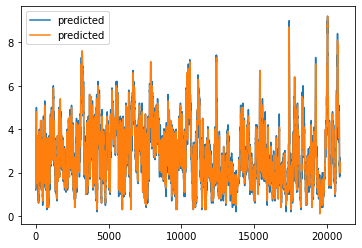

In [ ]:
plt.plot(y_pred, label = "predicted")
plt.plot(y_test, label = "predicted")
plt.legend()
plt.show()

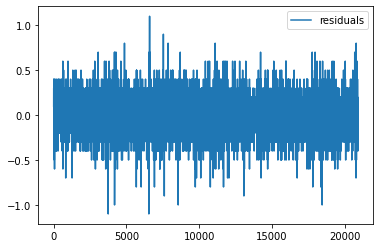

In [ ]:
plt.plot(y_test - y_pred, label = "residuals")
plt.legend()
plt.show()

In [ ]:
np.mean(y_test - y_pred), np.std(y_test - y_pred, ddof = 1)

(-0.0014099316541605377, 0.15601694465417498)

## Time for neural networks

In [ ]:
from sklearn.neural_network import MLPRegressor
ml = MLPRegressor(hidden_layer_sizes = (50,25))
ml.fit(X_train, y_train)
score = ml.score(X_test, y_test)
print(score)   #### this gives R2 score, no need to import sklearn r2score.
y_pred = ml.predict(X_test)

0.9945650174617251


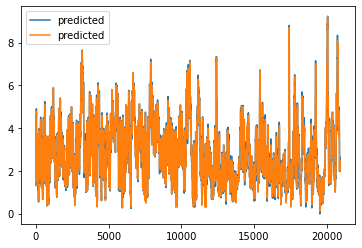

In [ ]:
plt.plot(y_pred, label = "predicted")
plt.plot(y_test, label = "predicted")
plt.legend()
plt.show()

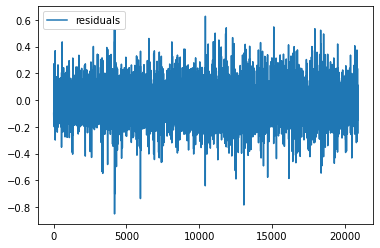

In [ ]:
plt.plot(y_test - y_pred, label = "residuals")
plt.legend()
plt.show()

In [ ]:
np.mean(y_test - y_pred), np.std(y_test - y_pred, ddof = 1)

(-0.021138864383226555, 0.10374814455778089)

In [ ]:
ml.coefs_

[array([[ 2.19076760e-001, -4.31103957e-109, -3.04172212e-002, ...,
         -6.26712595e-002, -3.19652895e-006,  2.62323857e-002],
        [ 1.80839916e-002, -6.08411437e-109, -2.81697964e-002, ...,
         -1.90735616e-001, -5.61416488e-006, -5.06158594e-002],
        [-1.45763019e-001, -1.05427331e-108, -2.39286660e-002, ...,
         -2.39960149e-001, -7.21553408e-007, -1.58098072e-002],
        ...,
        [-1.19448009e-004, -2.02059863e-108, -2.53867653e-002, ...,
          3.79224947e-001, -5.48576383e-006, -1.24736658e-001],
        [-8.12897815e-002, -1.39721092e-108, -2.35518911e-002, ...,
          2.85758862e-001, -7.82517772e-008,  2.11619568e-001],
        [ 5.20763329e-001, -5.56393663e-109, -2.52522630e-002, ...,
          7.19980858e-001, -4.31047783e-007,  6.94943347e-001]]),
 array([[ 1.93369701e-071, -3.20771852e-001,  2.07484304e-001, ...,
         -5.21221845e-002,  2.31249017e-001,  6.07730566e-316],
        [ 5.80040109e-316, -1.93465553e-315,  1.30141142e-038

###See what np.roll does to an array np.roll(A, shift)

In [ ]:
np.roll([1,2,3,4,5],-1)

array([2, 3, 4, 5, 1])

#Let's do a long term forecast and see what happens?

In [ ]:
def function(regressor, data:np.array, length = 10):
  temp = np.copy(data)
  for i in range(length):
    L = regressor.predict(temp.reshape(1,-1))
    temp = np.roll(temp, -1)
    temp[-1] = L
  return temp

In [ ]:
function(ml, X_train[-1], 250)  #### length 25 forecast we did.

array([-2.67380733e-01, -2.57540065e+00, -3.10437124e+00, -1.87858350e+00,
        4.61371383e-01,  3.29414180e+00,  7.33084864e+00,  1.15877694e+01,
        1.73735195e+01,  2.33198286e+01,  2.93052550e+01,  3.33756980e+01,
        3.46248624e+01,  3.32947051e+01,  2.97546999e+01,  2.57894168e+01,
        1.96574273e+01,  1.16199525e+01,  2.26174701e+00, -4.84445234e+00,
       -5.97797615e+00, -1.69295219e+00,  2.66963750e+00,  4.77354922e+00,
        5.70853964e+00,  5.39425446e+00,  5.18833821e+00,  5.01384311e+00,
        4.29433278e+00,  3.96964341e+00,  4.30254143e+00,  3.86438673e+00,
        2.84277668e+00,  2.83511521e+00,  3.51924018e+00,  4.58204985e+00,
        5.33166212e+00,  6.50887604e+00,  8.42969527e+00,  1.18293740e+01,
        1.46577158e+01,  1.47248426e+01,  1.48281005e+01,  1.37185621e+01,
        1.12544005e+01,  7.73188054e+00,  4.21729796e+00,  1.30833510e+00,
       -4.98566301e-02,  1.20816831e+00,  4.00340097e+00,  7.39586768e+00,
        9.91500343e+00,  

In [ ]:
index = data_test.index  ### we get the index set.  of the train set

In [ ]:
X_forecast = function(ml, X_train[-1], 50)  #### length 25 forecast we did.

In [ ]:
data_forecast = pd.Series(X_forecast)
data_forecast.index = range(index[0]+1, index[0]+len(data_forecast)+1)

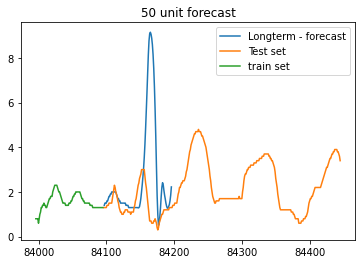

In [ ]:
plt.plot(data_forecast, label= "Longterm - forecast")
plt.plot(data_test[:350], label = "Test set")
plt.plot(data_train[-100:], label = "train set")
plt.title("50 unit forecast")
plt.legend()
plt.show()

##You see, long term forecast is not as easy as short term forecast.